# MVP Comunidad Valenciana

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import datetime as dt
from datetime import datetime

pd.options.display.max_columns = None

%matplotlib inline

In [2]:
data = pd.read_excel('../data/portfolio_com_valencia.xlsx')
data.drop(['Unnamed: 0'],axis=1,inplace=True)
data.head()

,Installation Date,Installation Number,Client Type,Panel,Territorial,Provincia,Zip,Gender,Nationality,Country Of Birth,Born Date,Housing Type,Labor Situation,Marital Status,Income Amount,Number Pay,Price List,Account Balance,Monitoring Status Date,Monitoring Status,Precio Contado,Precio Financiado,Quejas
0,2015-01-12,1835558,Normal,SDVFAST,Este,Valencia,46900,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1972-01-02,1 - PROPIEDAD SIN HIPOTECA,04 AUTONOMO,2 - CASADO,2009,12,HBE,0.0,2015-01-14,0,435,360.0,0
1,2015-01-12,1835654,Normal,SDVFAST,Este,Valencia,46716,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1989-09-20,1 - PROPIEDAD SIN HIPOTECA,01 ASALARIADO FIJO,1 - SOLTERO,1500,12,EED,0.0,2015-01-13,0,494,360.0,0
2,2015-01-12,1835683,Normal,SDVFAST,Este,Valencia,46716,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1963-05-31,1 - PROPIEDAD SIN HIPOTECA,01 ASALARIADO FIJO,2 - CASADO,2000,12,EED,0.0,2015-01-13,0,494,0.0,0
3,2015-01-12,1835716,Normal,SDVFAST,Este,Alicante,3110,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1958-07-31,2 - PROPIEDAD HIPOTECADA,03 FUNCIONARIO,4 - SEPARADO/DIVORCIADO,1400,12,HBD,0.0,2020-01-31,1,554,0.0,1
4,2015-01-12,1835728,Normal,SDVFAST,Este,Valencia,46394,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1975-04-08,1 - PROPIEDAD SIN HIPOTECA,04 AUTONOMO,2 - CASADO,2000,12,HBE,0.0,2015-01-13,0,435,360.0,1


In [3]:
data.shape

(48110, 23)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48110 entries, 0 to 48109
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Installation Date       48110 non-null  datetime64[ns]
 1   Installation Number     48110 non-null  int64         
 2   Client Type             48110 non-null  object        
 3   Panel                   48110 non-null  object        
 4   Territorial             48110 non-null  object        
 5   Provincia               48110 non-null  object        
 6   Zip                     48110 non-null  int64         
 7   Gender                  48110 non-null  object        
 8   Nationality             48110 non-null  object        
 9   Country Of Birth        48110 non-null  object        
 10  Born Date               47886 non-null  datetime64[ns]
 11  Housing Type            48110 non-null  object        
 12  Labor Situation         48110 non-null  object

In [5]:
data.isnull().sum()

Installation Date           0
Installation Number         0
Client Type                 0
Panel                       0
Territorial                 0
Provincia                   0
Zip                         0
Gender                      0
Nationality                 0
Country Of Birth            0
Born Date                 224
Housing Type                0
Labor Situation             0
Marital Status              0
Income Amount               0
Number Pay                  0
Price List                  0
Account Balance             0
Monitoring Status Date      0
Monitoring Status           0
Precio Contado              0
Precio Financiado           0
Quejas                      0
dtype: int64

In [6]:
def dataoveriew(df, message):
    print(f'{message}:\n')
    print("Número de Filas:", df.shape[0])
    print("\nNúmero de Columnas:", df.shape[1])
    print("\nColumnas:\n")
    print(data.columns.tolist())
    print("\nValores nulos:", df.isnull().sum().values.sum())
    print("\nValores únicos:\n")
    print(df.nunique())

In [7]:
dataoveriew(data, 'Overiew of the dataset')

Overiew of the dataset:

Número de Filas: 48110

Número de Columnas: 23

Columnas:

['Installation Date', 'Installation Number', 'Client Type', 'Panel', 'Territorial', 'Provincia', 'Zip', 'Gender', 'Nationality', 'Country Of Birth', 'Born Date', 'Housing Type', 'Labor Situation', 'Marital Status', 'Income Amount', 'Number Pay', 'Price List', 'Account Balance', 'Monitoring Status Date', 'Monitoring Status', 'Precio Contado', 'Precio Financiado', 'Quejas']

Valores nulos: 224

Valores únicos:

Installation Date          2104
Installation Number       48098
Client Type                   2
Panel                         2
Territorial                   1
Provincia                     3
Zip                         620
Gender                        2
Nationality                  11
Country Of Birth            134
Born Date                 18863
Housing Type                  5
Labor Situation               8
Marital Status                6
Income Amount               443
Number Pay             

In [8]:
data['Quejas'] = data['Quejas'].replace(np.nan, 0).astype('int')
data['Installation Number'] = data['Installation Number'].astype('str')
data['Zip'] = data['Zip'].astype('str')
data.head()

,Installation Date,Installation Number,Client Type,Panel,Territorial,Provincia,Zip,Gender,Nationality,Country Of Birth,Born Date,Housing Type,Labor Situation,Marital Status,Income Amount,Number Pay,Price List,Account Balance,Monitoring Status Date,Monitoring Status,Precio Contado,Precio Financiado,Quejas
0,2015-01-12,1835558,Normal,SDVFAST,Este,Valencia,46900,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1972-01-02,1 - PROPIEDAD SIN HIPOTECA,04 AUTONOMO,2 - CASADO,2009,12,HBE,0.0,2015-01-14,0,435,360.0,0
1,2015-01-12,1835654,Normal,SDVFAST,Este,Valencia,46716,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1989-09-20,1 - PROPIEDAD SIN HIPOTECA,01 ASALARIADO FIJO,1 - SOLTERO,1500,12,EED,0.0,2015-01-13,0,494,360.0,0
2,2015-01-12,1835683,Normal,SDVFAST,Este,Valencia,46716,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1963-05-31,1 - PROPIEDAD SIN HIPOTECA,01 ASALARIADO FIJO,2 - CASADO,2000,12,EED,0.0,2015-01-13,0,494,0.0,0
3,2015-01-12,1835716,Normal,SDVFAST,Este,Alicante,3110,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1958-07-31,2 - PROPIEDAD HIPOTECADA,03 FUNCIONARIO,4 - SEPARADO/DIVORCIADO,1400,12,HBD,0.0,2020-01-31,1,554,0.0,1
4,2015-01-12,1835728,Normal,SDVFAST,Este,Valencia,46394,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1975-04-08,1 - PROPIEDAD SIN HIPOTECA,04 AUTONOMO,2 - CASADO,2000,12,HBE,0.0,2015-01-13,0,435,360.0,1


In [9]:
data.describe()

,Income Amount,Number Pay,Account Balance,Monitoring Status,Precio Contado,Precio Financiado,Quejas
count,4.811000e+04,48110.000000,48110.000000,48110.000000,48110.000000,48110.000000,48110.000000
mean,4.360571e+04,12.925525,205.681220,0.103180,621.516483,202.570418,0.313157
std,5.456444e+06,1.066713,177.950818,0.304197,369.264899,225.275731,0.938350
min,1.000000e+00,12.000000,-567.000000,0.000000,9.000000,0.000000,0.000000
25%,1.200000e+03,12.000000,0.000000,0.000000,494.000000,0.000000,0.000000
50%,1.500000e+03,12.000000,205.700000,0.000000,554.000000,108.000000,0.000000
75%,2.000000e+03,14.000000,363.000000,0.000000,675.000000,360.000000,0.000000
max,1.000000e+09,16.000000,2808.390000,1.000000,24150.000000,3840.000000,23.000000


In [12]:
# sns.set_style(style = 'darkgrid')

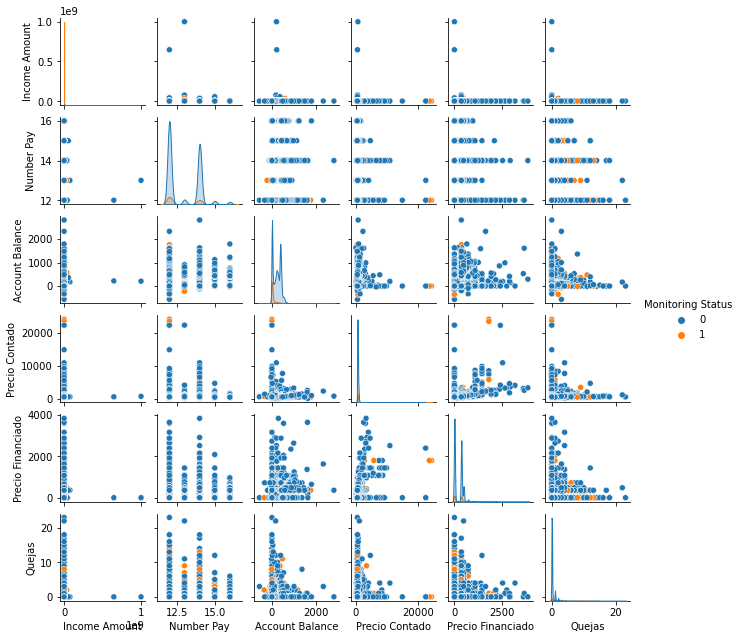

In [18]:
# Don´t do this!!!!

# sns.pairplot(data = data, diag_kind = 'kde', hue = 'Monitoring Status', height = 1.5);

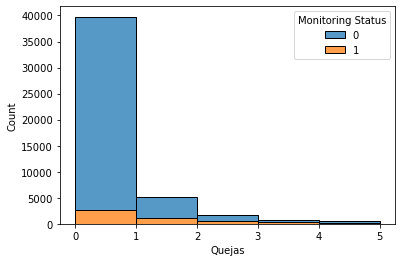

In [10]:
sns.histplot(data = data, x="Quejas", hue = 'Monitoring Status', multiple="stack",
             binwidth=1,  binrange = (0,5));

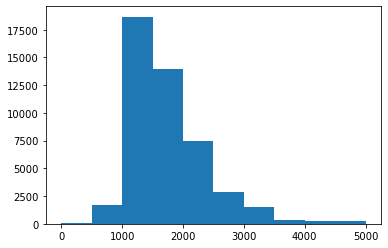

In [11]:
plt.hist(data['Income Amount'], range=(0, 5000));

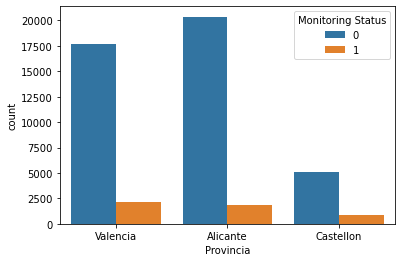

In [12]:
sns.countplot(x="Provincia", hue = 'Monitoring Status',data = data);

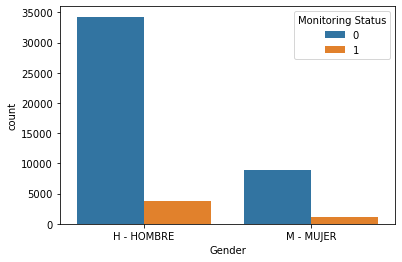

In [13]:
sns.countplot(x="Gender", hue = 'Monitoring Status',data = data);

In [14]:
data['Monitoring Status'] = data['Monitoring Status'].astype('str').str.strip()
data['Monitoring Status'] = data['Monitoring Status'].replace({'OP': 0, 'BAJA': 1}).astype(int)
data.head()

,Installation Date,Installation Number,Client Type,Panel,Territorial,Provincia,Zip,Gender,Nationality,Country Of Birth,Born Date,Housing Type,Labor Situation,Marital Status,Income Amount,Number Pay,Price List,Account Balance,Monitoring Status Date,Monitoring Status,Precio Contado,Precio Financiado,Quejas
0,2015-01-12,1835558,Normal,SDVFAST,Este,Valencia,46900,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1972-01-02,1 - PROPIEDAD SIN HIPOTECA,04 AUTONOMO,2 - CASADO,2009,12,HBE,0.0,2015-01-14,0,435,360.0,0
1,2015-01-12,1835654,Normal,SDVFAST,Este,Valencia,46716,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1989-09-20,1 - PROPIEDAD SIN HIPOTECA,01 ASALARIADO FIJO,1 - SOLTERO,1500,12,EED,0.0,2015-01-13,0,494,360.0,0
2,2015-01-12,1835683,Normal,SDVFAST,Este,Valencia,46716,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1963-05-31,1 - PROPIEDAD SIN HIPOTECA,01 ASALARIADO FIJO,2 - CASADO,2000,12,EED,0.0,2015-01-13,0,494,0.0,0
3,2015-01-12,1835716,Normal,SDVFAST,Este,Alicante,3110,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1958-07-31,2 - PROPIEDAD HIPOTECADA,03 FUNCIONARIO,4 - SEPARADO/DIVORCIADO,1400,12,HBD,0.0,2020-01-31,1,554,0.0,1
4,2015-01-12,1835728,Normal,SDVFAST,Este,Valencia,46394,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1975-04-08,1 - PROPIEDAD SIN HIPOTECA,04 AUTONOMO,2 - CASADO,2000,12,HBE,0.0,2015-01-13,0,435,360.0,1


In [16]:
corr = data.corr()
corr

,Income Amount,Number Pay,Account Balance,Monitoring Status,Precio Contado,Precio Financiado,Quejas
Income Amount,1.000000,-0.000996,0.000749,-0.002149,-0.000161,-0.005334,-0.002254
Number Pay,-0.000996,1.000000,0.065887,-0.042746,-0.020609,-0.079129,-0.017381
Account Balance,0.000749,0.065887,1.000000,-0.259465,0.002193,0.147185,-0.225325
Monitoring Status,-0.002149,-0.042746,-0.259465,1.000000,-0.022791,0.000026,0.229129
Precio Contado,-0.000161,-0.020609,0.002193,-0.022791,1.000000,0.224822,0.008932
Precio Financiado,-0.005334,-0.079129,0.147185,0.000026,0.224822,1.000000,-0.032537
Quejas,-0.002254,-0.017381,-0.225325,0.229129,0.008932,-0.032537,1.000000


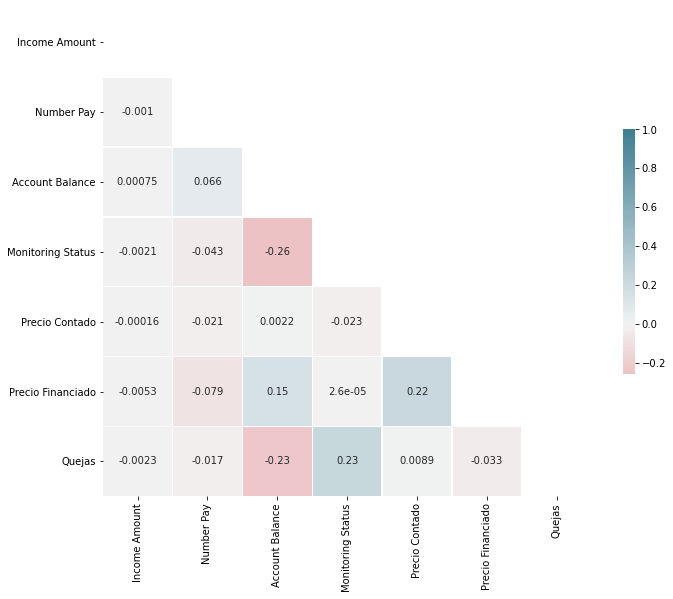

In [17]:
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(10, 220, as_cmap=True)
sns.heatmap(corr, annot=True, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

### Funciones

In [18]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, roc_curve

def evaluate(classifier, features, target):
    
    X_train, X_test, y_train, y_test = train_test_split(features, target)
    classifier.fit(X_train, y_train)

    predictions = classifier.predict(X_test)
    probabilities = classifier.predict_proba(X_test)[:, 1]

    acc = accuracy_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)
    auc = roc_auc_score(y_test, probabilities)
    fpr, tpr, threshold = roc_curve(y_test, probabilities)
    
    plt.plot(fpr, tpr)
    plt.xlabel('fpr')
    plt.ylabel('tpr')
    plt.gcf().set_size_inches(8, 6)
    
    return acc, f1, auc

In [19]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
   
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    


    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        
        
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
#Using Activo and Baja for 0 and 1    
class_names = ['Activo','Baja']

In [20]:
data.head()

,Installation Date,Installation Number,Client Type,Panel,Territorial,Provincia,Zip,Gender,Nationality,Country Of Birth,Born Date,Housing Type,Labor Situation,Marital Status,Income Amount,Number Pay,Price List,Account Balance,Monitoring Status Date,Monitoring Status,Precio Contado,Precio Financiado,Quejas
0,2015-01-12,1835558,Normal,SDVFAST,Este,Valencia,46900,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1972-01-02,1 - PROPIEDAD SIN HIPOTECA,04 AUTONOMO,2 - CASADO,2009,12,HBE,0.0,2015-01-14,0,435,360.0,0
1,2015-01-12,1835654,Normal,SDVFAST,Este,Valencia,46716,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1989-09-20,1 - PROPIEDAD SIN HIPOTECA,01 ASALARIADO FIJO,1 - SOLTERO,1500,12,EED,0.0,2015-01-13,0,494,360.0,0
2,2015-01-12,1835683,Normal,SDVFAST,Este,Valencia,46716,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1963-05-31,1 - PROPIEDAD SIN HIPOTECA,01 ASALARIADO FIJO,2 - CASADO,2000,12,EED,0.0,2015-01-13,0,494,0.0,0
3,2015-01-12,1835716,Normal,SDVFAST,Este,Alicante,3110,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1958-07-31,2 - PROPIEDAD HIPOTECADA,03 FUNCIONARIO,4 - SEPARADO/DIVORCIADO,1400,12,HBD,0.0,2020-01-31,1,554,0.0,1
4,2015-01-12,1835728,Normal,SDVFAST,Este,Valencia,46394,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1975-04-08,1 - PROPIEDAD SIN HIPOTECA,04 AUTONOMO,2 - CASADO,2000,12,HBE,0.0,2015-01-13,0,435,360.0,1


## Baseline: Sin variables categóricas

In [20]:
data_filtered = data[['Quejas', 'Monitoring Status']]
data_filtered.head()

,Quejas,Monitoring Status
0,0,0
1,0,0
2,0,0
3,1,1
4,1,0


In [21]:
X = data_filtered.iloc[:, :-1]
y = data_filtered.iloc[:, 1]

In [22]:
X

,Quejas
0,0
1,0
2,0
3,1
4,1
...,...
48105,1
48106,0
48107,0
48108,0


In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)

### Regresión Logística

In [24]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state = 0, class_weight="balanced")
classifier.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', random_state=0)

In [25]:
y_pred = classifier.predict(X_test)

              precision    recall  f1-score   support

           0       0.93      0.86      0.90      8629
           1       0.27      0.45      0.34       993

    accuracy                           0.82      9622
   macro avg       0.60      0.65      0.62      9622
weighted avg       0.86      0.82      0.84      9622



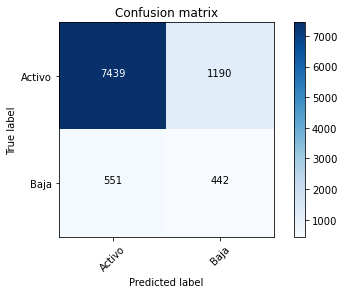

In [26]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test,y_pred ))

cm = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(cm, classes=class_names, title='Confusion matrix')

(0.8189225141336881, 0.34397590361445785, 0.6657208220694554)

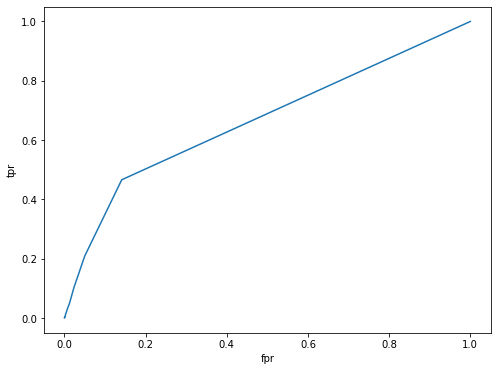

In [27]:
evaluate(classifier, X, y)

Average precision-recall score: 0.18


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.18')

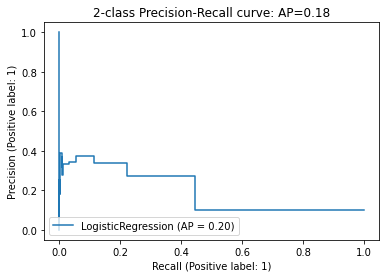

In [28]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import average_precision_score

average_precision = average_precision_score(y_test, y_pred)

print('Average precision-recall score: {0:0.2f}'.format(average_precision))

disp = plot_precision_recall_curve(classifier, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))

## New features

- Edad en Años
- Rango de Income Amount
- Días Activo

Rangos de Edad:

In [21]:
data.columns

Index(['Installation Date', 'Installation Number', 'Client Type', 'Panel',
       'Territorial', 'Provincia', 'Zip', 'Gender', 'Nationality',
       'Country Of Birth', 'Born Date', 'Housing Type', 'Labor Situation',
       'Marital Status', 'Income Amount', 'Number Pay', 'Price List',
       'Account Balance', 'Monitoring Status Date', 'Monitoring Status',
       'Precio Contado', 'Precio Financiado', 'Quejas'],
      dtype='object')

In [22]:
data['Born Date'].isnull().sum()

224

In [23]:
data['Born Date'] = data['Born Date'].replace(np.nan, datetime(1970, 1, 1))

data.head()

,Installation Date,Installation Number,Client Type,Panel,Territorial,Provincia,Zip,Gender,Nationality,Country Of Birth,Born Date,Housing Type,Labor Situation,Marital Status,Income Amount,Number Pay,Price List,Account Balance,Monitoring Status Date,Monitoring Status,Precio Contado,Precio Financiado,Quejas
0,2015-01-12,1835558,Normal,SDVFAST,Este,Valencia,46900,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1972-01-02,1 - PROPIEDAD SIN HIPOTECA,04 AUTONOMO,2 - CASADO,2009,12,HBE,0.0,2015-01-14,0,435,360.0,0
1,2015-01-12,1835654,Normal,SDVFAST,Este,Valencia,46716,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1989-09-20,1 - PROPIEDAD SIN HIPOTECA,01 ASALARIADO FIJO,1 - SOLTERO,1500,12,EED,0.0,2015-01-13,0,494,360.0,0
2,2015-01-12,1835683,Normal,SDVFAST,Este,Valencia,46716,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1963-05-31,1 - PROPIEDAD SIN HIPOTECA,01 ASALARIADO FIJO,2 - CASADO,2000,12,EED,0.0,2015-01-13,0,494,0.0,0
3,2015-01-12,1835716,Normal,SDVFAST,Este,Alicante,3110,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1958-07-31,2 - PROPIEDAD HIPOTECADA,03 FUNCIONARIO,4 - SEPARADO/DIVORCIADO,1400,12,HBD,0.0,2020-01-31,1,554,0.0,1
4,2015-01-12,1835728,Normal,SDVFAST,Este,Valencia,46394,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1975-04-08,1 - PROPIEDAD SIN HIPOTECA,04 AUTONOMO,2 - CASADO,2000,12,HBE,0.0,2015-01-13,0,435,360.0,1


In [24]:
data['Born Date'].isnull().sum()

0

In [25]:
# Edad actual si OP y edad cuando se dio de baja si BAJA

data['Edad'] = 0
fecha = datetime(2021, 1, 19)

for i in range(len(data['Born Date'])):
    if data.loc[i, 'Monitoring Status'] == 0:
        data.loc[i,'Edad'] = ((fecha - data.loc[i,'Born Date']).days)/365
    else:
        data.loc[i,'Edad'] = ((data.loc[i,'Monitoring Status Date'] - data.loc[i,'Born Date']).days)/365
                        
data.head()

# data.loc[i,'Edad'] = ((data.loc[i,'Monitoring Status Date'] - data.loc[i,'Born Date']).dt.days.astype(float))/365

,Installation Date,Installation Number,Client Type,Panel,Territorial,Provincia,Zip,Gender,Nationality,Country Of Birth,Born Date,Housing Type,Labor Situation,Marital Status,Income Amount,Number Pay,Price List,Account Balance,Monitoring Status Date,Monitoring Status,Precio Contado,Precio Financiado,Quejas,Edad
0,2015-01-12,1835558,Normal,SDVFAST,Este,Valencia,46900,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1972-01-02,1 - PROPIEDAD SIN HIPOTECA,04 AUTONOMO,2 - CASADO,2009,12,HBE,0.0,2015-01-14,0,435,360.0,0,49.082192
1,2015-01-12,1835654,Normal,SDVFAST,Este,Valencia,46716,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1989-09-20,1 - PROPIEDAD SIN HIPOTECA,01 ASALARIADO FIJO,1 - SOLTERO,1500,12,EED,0.0,2015-01-13,0,494,360.0,0,31.353425
2,2015-01-12,1835683,Normal,SDVFAST,Este,Valencia,46716,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1963-05-31,1 - PROPIEDAD SIN HIPOTECA,01 ASALARIADO FIJO,2 - CASADO,2000,12,EED,0.0,2015-01-13,0,494,0.0,0,57.679452
3,2015-01-12,1835716,Normal,SDVFAST,Este,Alicante,3110,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1958-07-31,2 - PROPIEDAD HIPOTECADA,03 FUNCIONARIO,4 - SEPARADO/DIVORCIADO,1400,12,HBD,0.0,2020-01-31,1,554,0.0,1,61.545205
4,2015-01-12,1835728,Normal,SDVFAST,Este,Valencia,46394,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1975-04-08,1 - PROPIEDAD SIN HIPOTECA,04 AUTONOMO,2 - CASADO,2000,12,HBE,0.0,2015-01-13,0,435,360.0,1,45.816438


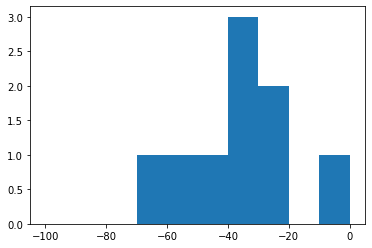

In [26]:
plt.hist(data['Edad'], range = (-100,0));

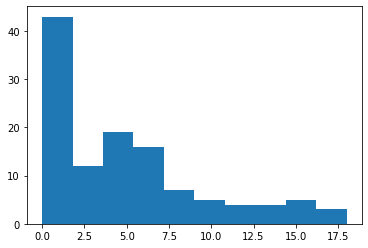

In [27]:
plt.hist(data['Edad'], range = (0,18));

In [28]:
data['Edad'].mean()

53.51658550752655

In [29]:
for i in range(len(data['Edad'])):
    if data.loc[i, 'Edad'] < 18:
        data.loc[i, 'Edad'] = data['Edad'].mean()
    else:
        continue

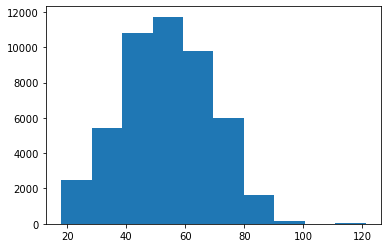

In [30]:
plt.hist(data['Edad']);

In [31]:
# Mapping Edad 
data.loc[data['Edad'] <= 30, 'Rango_Edad'] = "18-30"
data.loc[(data['Edad'] > 30) & (data['Edad'] <= 40), 'Rango_Edad'] = "30-40"
data.loc[(data['Edad'] > 40) & (data['Edad'] <= 50), 'Rango_Edad'] = "40-50"
data.loc[(data['Edad'] > 50) & (data['Edad'] <= 60), 'Rango_Edad'] = "50-60"
data.loc[(data['Edad'] > 60) & (data['Edad'] <= 70), 'Rango_Edad'] = "60-70"
data.loc[(data['Edad'] > 70) & (data['Edad'] <= 80), 'Rango_Edad'] = "70-80"
data.loc[data['Edad'] > 80, 'Rango_Edad'] = "+80"
data.head()

,Installation Date,Installation Number,Client Type,Panel,Territorial,Provincia,Zip,Gender,Nationality,Country Of Birth,Born Date,Housing Type,Labor Situation,Marital Status,Income Amount,Number Pay,Price List,Account Balance,Monitoring Status Date,Monitoring Status,Precio Contado,Precio Financiado,Quejas,Edad,Rango_Edad
0,2015-01-12,1835558,Normal,SDVFAST,Este,Valencia,46900,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1972-01-02,1 - PROPIEDAD SIN HIPOTECA,04 AUTONOMO,2 - CASADO,2009,12,HBE,0.0,2015-01-14,0,435,360.0,0,49.082192,40-50
1,2015-01-12,1835654,Normal,SDVFAST,Este,Valencia,46716,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1989-09-20,1 - PROPIEDAD SIN HIPOTECA,01 ASALARIADO FIJO,1 - SOLTERO,1500,12,EED,0.0,2015-01-13,0,494,360.0,0,31.353425,30-40
2,2015-01-12,1835683,Normal,SDVFAST,Este,Valencia,46716,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1963-05-31,1 - PROPIEDAD SIN HIPOTECA,01 ASALARIADO FIJO,2 - CASADO,2000,12,EED,0.0,2015-01-13,0,494,0.0,0,57.679452,50-60
3,2015-01-12,1835716,Normal,SDVFAST,Este,Alicante,3110,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1958-07-31,2 - PROPIEDAD HIPOTECADA,03 FUNCIONARIO,4 - SEPARADO/DIVORCIADO,1400,12,HBD,0.0,2020-01-31,1,554,0.0,1,61.545205,60-70
4,2015-01-12,1835728,Normal,SDVFAST,Este,Valencia,46394,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1975-04-08,1 - PROPIEDAD SIN HIPOTECA,04 AUTONOMO,2 - CASADO,2000,12,HBE,0.0,2015-01-13,0,435,360.0,1,45.816438,40-50


In [32]:
tab1 = pd.crosstab(data["Rango_Edad"], data["Monitoring Status"], margins = True)
tab2 = pd.crosstab(data["Rango_Edad"], data["Monitoring Status"], margins = True, normalize = 'index')
pd.concat([tab1, tab2], axis = 1)

Monitoring Status,0,1,All,0,1
Rango_Edad,,,,,
+80,1665,121,1786,0.932251,0.067749
18-30,2694,311,3005,0.896506,0.103494
30-40,5007,1052,6059,0.826374,0.173626
40-50,9371,1480,10851,0.863607,0.136393
50-60,10285,1024,11309,0.909453,0.090547
60-70,8716,661,9377,0.929508,0.070492
70-80,5408,315,5723,0.944959,0.055041
All,43146,4964,48110,0.896820,0.103180


Rangos de Income Amount:

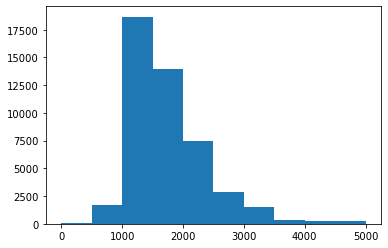

In [33]:
plt.hist(data['Income Amount'], range=(0, 5000));

In [34]:
# Mapping Income Amount
data.loc[data['Income Amount'] <= 1000, 'Income'] = "0-1000"
data.loc[(data['Income Amount'] > 1000) & (data['Income Amount'] <= 1500), 'Income'] = "1000-1500"
data.loc[(data['Income Amount'] > 1500) & (data['Income Amount'] <= 2000), 'Income'] = "1500-2000"
data.loc[(data['Income Amount'] > 2000) & (data['Income Amount'] <= 3000), 'Income'] = "2000-3000"
data.loc[data['Income Amount'] > 3000, 'Income'] = "+3000"
data.head()

,Installation Date,Installation Number,Client Type,Panel,Territorial,Provincia,Zip,Gender,Nationality,Country Of Birth,Born Date,Housing Type,Labor Situation,Marital Status,Income Amount,Number Pay,Price List,Account Balance,Monitoring Status Date,Monitoring Status,Precio Contado,Precio Financiado,Quejas,Edad,Rango_Edad,Income
0,2015-01-12,1835558,Normal,SDVFAST,Este,Valencia,46900,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1972-01-02,1 - PROPIEDAD SIN HIPOTECA,04 AUTONOMO,2 - CASADO,2009,12,HBE,0.0,2015-01-14,0,435,360.0,0,49.082192,40-50,2000-3000
1,2015-01-12,1835654,Normal,SDVFAST,Este,Valencia,46716,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1989-09-20,1 - PROPIEDAD SIN HIPOTECA,01 ASALARIADO FIJO,1 - SOLTERO,1500,12,EED,0.0,2015-01-13,0,494,360.0,0,31.353425,30-40,1000-1500
2,2015-01-12,1835683,Normal,SDVFAST,Este,Valencia,46716,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1963-05-31,1 - PROPIEDAD SIN HIPOTECA,01 ASALARIADO FIJO,2 - CASADO,2000,12,EED,0.0,2015-01-13,0,494,0.0,0,57.679452,50-60,1500-2000
3,2015-01-12,1835716,Normal,SDVFAST,Este,Alicante,3110,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1958-07-31,2 - PROPIEDAD HIPOTECADA,03 FUNCIONARIO,4 - SEPARADO/DIVORCIADO,1400,12,HBD,0.0,2020-01-31,1,554,0.0,1,61.545205,60-70,1000-1500
4,2015-01-12,1835728,Normal,SDVFAST,Este,Valencia,46394,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1975-04-08,1 - PROPIEDAD SIN HIPOTECA,04 AUTONOMO,2 - CASADO,2000,12,HBE,0.0,2015-01-13,0,435,360.0,1,45.816438,40-50,1500-2000


In [35]:
tab1 = pd.crosstab(data["Income"], data["Monitoring Status"], margins = True)
tab2 = pd.crosstab(data["Income"], data["Monitoring Status"], margins = True, normalize = 'index')
pd.concat([tab1, tab2], axis = 1)

Monitoring Status,0,1,All,0,1
Income,,,,,
+3000,1768,177,1945,0.908997,0.091003
0-1000,7352,1102,8454,0.869648,0.130352
1000-1500,19486,2152,21638,0.900545,0.099455
1500-2000,9956,1111,11067,0.899611,0.100389
2000-3000,4584,422,5006,0.915701,0.084299
All,43146,4964,48110,0.896820,0.103180


Días Activo:

In [36]:
# Días hasta el 19/01/2021 si OP y hasta cuando se dio de baja si BAJA

data['Dias_Activo'] = 0
fecha = datetime(2021, 1, 19)

for i in range(len(data['Installation Date'])):
    if data.loc[i, 'Monitoring Status'] == 0:
        data.loc[i,'Dias_Activo'] = (fecha - data.loc[i,'Installation Date']).days
    else:
        data.loc[i,'Dias_Activo'] = (data.loc[i,'Monitoring Status Date'] - data.loc[i,'Installation Date']).days
                        
data.head()

,Installation Date,Installation Number,Client Type,Panel,Territorial,Provincia,Zip,Gender,Nationality,Country Of Birth,Born Date,Housing Type,Labor Situation,Marital Status,Income Amount,Number Pay,Price List,Account Balance,Monitoring Status Date,Monitoring Status,Precio Contado,Precio Financiado,Quejas,Edad,Rango_Edad,Income,Dias_Activo
0,2015-01-12,1835558,Normal,SDVFAST,Este,Valencia,46900,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1972-01-02,1 - PROPIEDAD SIN HIPOTECA,04 AUTONOMO,2 - CASADO,2009,12,HBE,0.0,2015-01-14,0,435,360.0,0,49.082192,40-50,2000-3000,2199
1,2015-01-12,1835654,Normal,SDVFAST,Este,Valencia,46716,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1989-09-20,1 - PROPIEDAD SIN HIPOTECA,01 ASALARIADO FIJO,1 - SOLTERO,1500,12,EED,0.0,2015-01-13,0,494,360.0,0,31.353425,30-40,1000-1500,2199
2,2015-01-12,1835683,Normal,SDVFAST,Este,Valencia,46716,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1963-05-31,1 - PROPIEDAD SIN HIPOTECA,01 ASALARIADO FIJO,2 - CASADO,2000,12,EED,0.0,2015-01-13,0,494,0.0,0,57.679452,50-60,1500-2000,2199
3,2015-01-12,1835716,Normal,SDVFAST,Este,Alicante,3110,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1958-07-31,2 - PROPIEDAD HIPOTECADA,03 FUNCIONARIO,4 - SEPARADO/DIVORCIADO,1400,12,HBD,0.0,2020-01-31,1,554,0.0,1,61.545205,60-70,1000-1500,1845
4,2015-01-12,1835728,Normal,SDVFAST,Este,Valencia,46394,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1975-04-08,1 - PROPIEDAD SIN HIPOTECA,04 AUTONOMO,2 - CASADO,2000,12,HBE,0.0,2015-01-13,0,435,360.0,1,45.816438,40-50,1500-2000,2199


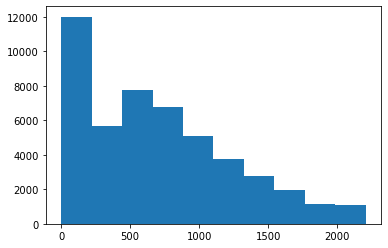

In [40]:
plt.hist(data['Dias_Activo']);

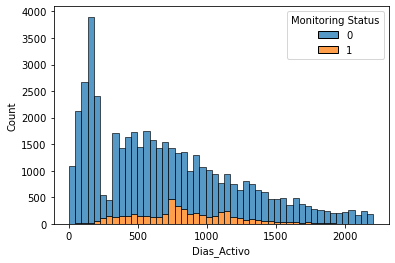

In [43]:
sns.histplot(data = data, x = 'Dias_Activo', hue = 'Monitoring Status', multiple = 'stac')

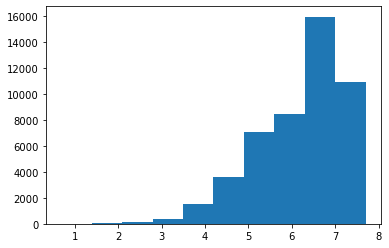

In [46]:
plt.hist(np.log1p(data['Dias_Activo']));

In [47]:
data['Dias_Activo_log'] = np.log1p(data['Dias_Activo'])
data.head()

,Installation Date,Installation Number,Client Type,Panel,Territorial,Provincia,Zip,Gender,Nationality,Country Of Birth,Born Date,Housing Type,Labor Situation,Marital Status,Income Amount,Number Pay,Price List,Account Balance,Monitoring Status Date,Monitoring Status,Precio Contado,Precio Financiado,Quejas,Edad,Rango_Edad,Income,Dias_Activo,Dias_Activo_log
0,2015-01-12,1835558,Normal,SDVFAST,Este,Valencia,46900,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1972-01-02,1 - PROPIEDAD SIN HIPOTECA,04 AUTONOMO,2 - CASADO,2009,12,HBE,0.0,2015-01-14,0,435,360.0,0,49.082192,40-50,2000-3000,2199,7.696213
1,2015-01-12,1835654,Normal,SDVFAST,Este,Valencia,46716,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1989-09-20,1 - PROPIEDAD SIN HIPOTECA,01 ASALARIADO FIJO,1 - SOLTERO,1500,12,EED,0.0,2015-01-13,0,494,360.0,0,31.353425,30-40,1000-1500,2199,7.696213
2,2015-01-12,1835683,Normal,SDVFAST,Este,Valencia,46716,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1963-05-31,1 - PROPIEDAD SIN HIPOTECA,01 ASALARIADO FIJO,2 - CASADO,2000,12,EED,0.0,2015-01-13,0,494,0.0,0,57.679452,50-60,1500-2000,2199,7.696213
3,2015-01-12,1835716,Normal,SDVFAST,Este,Alicante,3110,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1958-07-31,2 - PROPIEDAD HIPOTECADA,03 FUNCIONARIO,4 - SEPARADO/DIVORCIADO,1400,12,HBD,0.0,2020-01-31,1,554,0.0,1,61.545205,60-70,1000-1500,1845,7.520776
4,2015-01-12,1835728,Normal,SDVFAST,Este,Valencia,46394,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1975-04-08,1 - PROPIEDAD SIN HIPOTECA,04 AUTONOMO,2 - CASADO,2000,12,HBE,0.0,2015-01-13,0,435,360.0,1,45.816438,40-50,1500-2000,2199,7.696213


## Enconding con ``get_dummies``

In [48]:
data.columns

Index(['Installation Date', 'Installation Number', 'Client Type', 'Panel',
       'Territorial', 'Provincia', 'Zip', 'Gender', 'Nationality',
       'Country Of Birth', 'Born Date', 'Housing Type', 'Labor Situation',
       'Marital Status', 'Income Amount', 'Number Pay', 'Price List',
       'Account Balance', 'Monitoring Status Date', 'Monitoring Status',
       'Precio Contado', 'Precio Financiado', 'Quejas', 'Edad', 'Rango_Edad',
       'Income', 'Dias_Activo', 'Dias_Activo_log'],
      dtype='object')

In [49]:
data_filtered = data[['Gender', 'Housing Type', 'Labor Situation', 'Marital Status', 'Provincia', 'Nationality',
                      'Rango_Edad', 'Income', 'Dias_Activo_log', 'Quejas', 'Monitoring Status']]
data_filtered.columns

Index(['Gender', 'Housing Type', 'Labor Situation', 'Marital Status',
       'Provincia', 'Nationality', 'Rango_Edad', 'Income', 'Dias_Activo_log',
       'Quejas', 'Monitoring Status'],
      dtype='object')

In [50]:
Gender = pd.get_dummies(data = data_filtered['Gender'],prefix = "Gender")
House = pd.get_dummies(data = data_filtered['Housing Type'],prefix = "House")
Labor = pd.get_dummies(data = data_filtered['Labor Situation'],prefix = "Labor")
Marital = pd.get_dummies(data = data_filtered['Marital Status'],prefix = "Marital")
Provincia = pd.get_dummies(data = data_filtered['Provincia'],prefix = "Provincia")
Nationality = pd.get_dummies(data = data_filtered['Nationality'],prefix = "Nationality")
Edad = pd.get_dummies(data = data_filtered['Rango_Edad'],prefix = "Rango_Edad")
Income = pd.get_dummies(data = data_filtered['Income'],prefix = "Income")

In [51]:
data_filtered.drop(['Gender','Housing Type','Labor Situation','Provincia', 
                    'Nationality', 'Marital Status', 'Rango_Edad', 'Income'],axis=1,inplace=True)

C:\Users\alber\anaconda3\lib\site-packages\pandas\core\frame.py:4167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [52]:
dummy_df = pd.concat([data_filtered,Gender,House,Labor,Marital,Provincia,Nationality,Edad, Income],axis=1)
dummy_df.columns

Index(['Dias_Activo_log', 'Quejas', 'Monitoring Status', 'Gender_H - HOMBRE',
       'Gender_M - MUJER', 'House_1 - PROPIEDAD SIN HIPOTECA',
       'House_2 - PROPIEDAD HIPOTECADA', 'House_3 - ALQUILER',
       'House_4 - FAMILIARES/PADRES', 'House_5 - EMPRESA',
       'Labor_01 ASALARIADO FIJO', 'Labor_02 ASALARIADO TEMPORAL',
       'Labor_03 FUNCIONARIO', 'Labor_04 AUTONOMO', 'Labor_06 PARADO',
       'Labor_07 PENSIONISTA (JUBILACION)', 'Labor_08 PENSIONISTA (VIUDEDAD)',
       'Labor_09 PENSIONISTA (LARGA ENFERMEDAD)', 'Marital_1 - SOLTERO',
       'Marital_2 - CASADO', 'Marital_3 - VIUDO',
       'Marital_4 - SEPARADO/DIVORCIADO', 'Marital_5 ? PAREJA DE HECHO',
       'Marital_5 â PAREJA DE HECHO', 'Provincia_Alicante',
       'Provincia_Castellon', 'Provincia_Valencia',
       'Nationality_AF - AFRICA MENOS MAGREB',
       'Nationality_AJ - AUSTRALIA Y JAPON',
       'Nationality_AS - ASIA MENOS JAPON', 'Nationality_ES - ESPAÃOLA',
       'Nationality_ES - ESPAÑOLA', 'Nationa

In [57]:
dummy_df.head()

,Quejas,Monitoring Status,Gender_H - HOMBRE,Gender_M - MUJER,House_1 - PROPIEDAD SIN HIPOTECA,House_2 - PROPIEDAD HIPOTECADA,House_3 - ALQUILER,House_4 - FAMILIARES/PADRES,House_5 - EMPRESA,Labor_01 ASALARIADO FIJO,Labor_02 ASALARIADO TEMPORAL,Labor_03 FUNCIONARIO,Labor_04 AUTONOMO,Labor_06 PARADO,Labor_07 PENSIONISTA (JUBILACION),Labor_08 PENSIONISTA (VIUDEDAD),Labor_09 PENSIONISTA (LARGA ENFERMEDAD),Marital_1 - SOLTERO,Marital_2 - CASADO,Marital_3 - VIUDO,Marital_4 - SEPARADO/DIVORCIADO,Marital_5 ? PAREJA DE HECHO,Marital_5 â PAREJA DE HECHO,Provincia_Alicante,Provincia_Castellon,Provincia_Valencia,Nationality_AF - AFRICA MENOS MAGREB,Nationality_AJ - AUSTRALIA Y JAPON,Nationality_AS - ASIA MENOS JAPON,Nationality_ES - ESPAÃOLA,Nationality_ES - ESPAÑOLA,Nationality_IB - IBEROAMERICA,Nationality_MA - MAGREB,Nationality_OT - OTROS,Nationality_RE - RESTO DE EUROPA,Nationality_UE - UNION EUROPEA,Nationality_US - USA / CANADA,Rango_Edad_+80,Rango_Edad_18-30,Rango_Edad_30-40,Rango_Edad_40-50,Rango_Edad_50-60,Rango_Edad_60-70,Rango_Edad_70-80,Income_+3000,Income_0-1000,Income_1000-1500,Income_1500-2000,Income_2000-3000
0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
2,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
3,1,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
4,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0


In [53]:
X = dummy_df.drop(['Monitoring Status'],axis=1).values
y = dummy_df['Monitoring Status'].values

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)

### Regresión Logística

In [58]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state = 0, class_weight="balanced")
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

C:\Users\alber\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.95      0.71      0.81      8629
           1       0.21      0.68      0.32       993

    accuracy                           0.71      9622
   macro avg       0.58      0.69      0.57      9622
weighted avg       0.87      0.71      0.76      9622



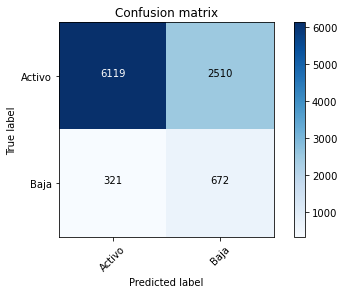

In [59]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test,y_pred))
plot_confusion_matrix(cm, classes=class_names, title='Confusion matrix')

C:\Users\alber\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(0.7026937146657799, 0.32272727272727275, 0.7724129029907858)

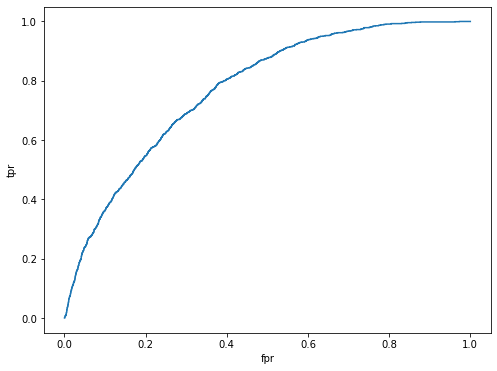

In [60]:
evaluate(classifier, X, y)

Average precision-recall score: 0.18


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.18')

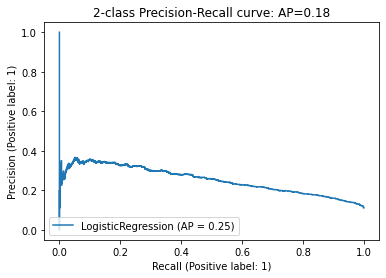

In [61]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import average_precision_score

average_precision = average_precision_score(y_test, y_pred)

print('Average precision-recall score: {0:0.2f}'.format(average_precision))

disp = plot_precision_recall_curve(classifier, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))

### KNN

In [62]:
from sklearn.neighbors import KNeighborsClassifier

In [54]:
# Don´t do this!!!

from sklearn.model_selection import GridSearchCV

classifier = GridSearchCV(KNeighborsClassifier(),
                      param_grid = {'n_neighbors':np.arange(2,10)},
                      scoring = 'recall')

classifier.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([2, 3, 4, 5, 6, 7, 8, 9])},
             scoring='recall')

In [195]:
classifier.best_params_

AttributeError: 'LogisticRegression' object has no attribute 'best_params_'

In [63]:
classifier = KNeighborsClassifier(n_neighbors = 3)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [64]:
y_pred = classifier.predict(X_test)

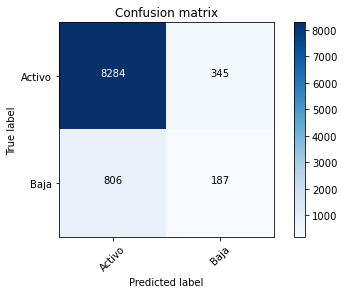

In [65]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred)

plot_confusion_matrix(cm, classes=class_names, title='Confusion matrix')

In [66]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.96      0.94      8629
           1       0.35      0.19      0.25       993

    accuracy                           0.88      9622
   macro avg       0.63      0.57      0.59      9622
weighted avg       0.85      0.88      0.86      9622



(0.8819421350182907, 0.24387646432374865, 0.6686054727874343)

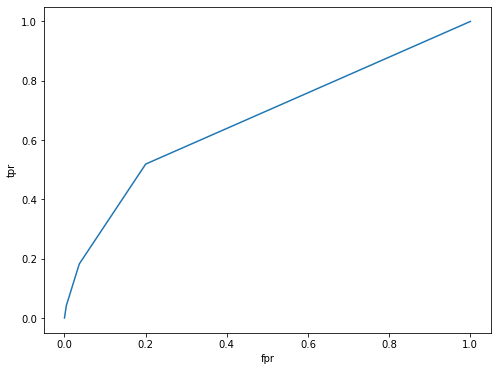

In [67]:
evaluate(classifier, X, y)

Average precision-recall score: 0.15


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.15')

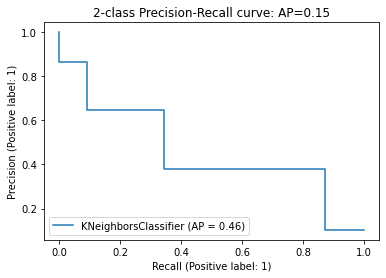

In [68]:
average_precision = average_precision_score(y_test, y_pred)

print('Average precision-recall score: {0:0.2f}'.format(average_precision))

disp = plot_precision_recall_curve(classifier, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))

### Decission Tree Classifier

Decision Tree Accuracy is 0.73
Cross Validation Score = 0.26
              precision    recall  f1-score   support

           0       0.96      0.73      0.83      8629
           1       0.23      0.73      0.35       993

    accuracy                           0.73      9622
   macro avg       0.60      0.73      0.59      9622
weighted avg       0.88      0.73      0.78      9622



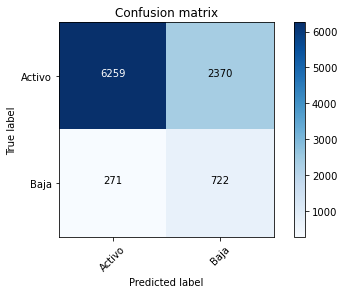

In [69]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

DT = DecisionTreeClassifier(random_state = 0,class_weight="balanced", min_weight_fraction_leaf=0.01)
DT = DT.fit(X_train,y_train)
print ("Decision Tree Accuracy is %2.2f" % accuracy_score(y_test, DT.predict(X_test)))

score_DT = cross_val_score(DT, X, y, cv=10).mean()
print("Cross Validation Score = %2.2f" % score_DT)

y_pred = DT.predict(X_test)
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(cm, classes=class_names, title='Confusion matrix')

(0.7166611240438976, 0.36131934032983504, 0.8078560318833403)

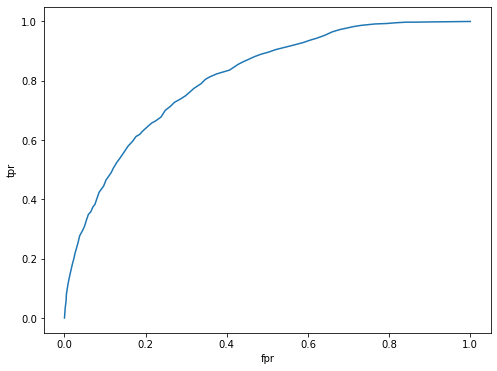

In [70]:
evaluate(DT, X, y)

Average precision-recall score: 0.20


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.20')

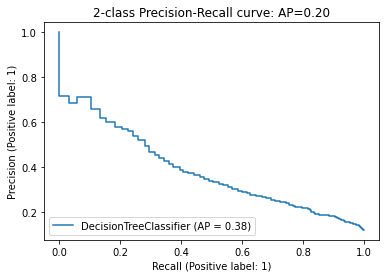

In [71]:
average_precision = average_precision_score(y_test, y_pred)

print('Average precision-recall score: {0:0.2f}'.format(average_precision))

disp = plot_precision_recall_curve(DT, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))

### Random Forest Classifier

Random Forest Accuracy is 0.86
Cross Validation Score = 0.57
              precision    recall  f1-score   support

           0       0.94      0.90      0.92      8629
           1       0.36      0.47      0.41       993

    accuracy                           0.86      9622
   macro avg       0.65      0.69      0.66      9622
weighted avg       0.88      0.86      0.87      9622



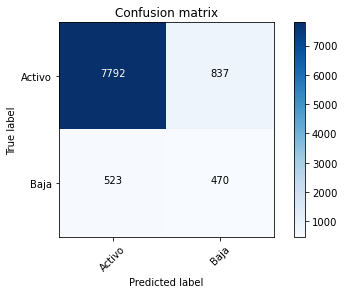

In [72]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100, max_depth=None, min_samples_split=10,class_weight="balanced")
rfc.fit(X_train, y_train)
print ("Random Forest Accuracy is %2.2f" % accuracy_score(y_test, rfc.predict(X_test)))

score_rfc = cross_val_score(rfc, X, y, cv=10).mean()
print("Cross Validation Score = %2.2f" % score_rfc)

y_pred = rfc.predict(X_test)
print(classification_report(y_test,y_pred ))

cm = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(cm, classes=class_names, title='Confusion matrix')

(0.858579980046558, 0.3970223325062035, 0.7928746591133257)

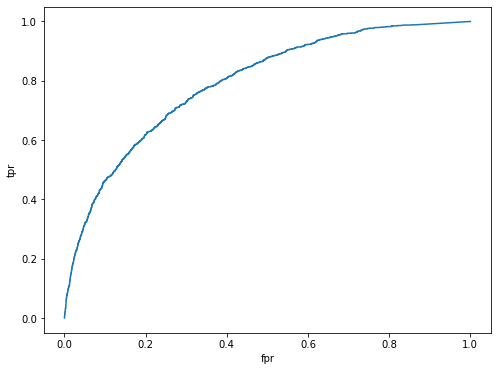

In [73]:
evaluate(rfc, X, y)

Average precision-recall score: 0.22


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.22')

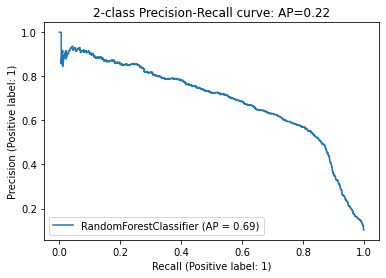

In [74]:
average_precision = average_precision_score(y_test, y_pred)

print('Average precision-recall score: {0:0.2f}'.format(average_precision))

disp = plot_precision_recall_curve(rfc, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))

### Feature importances

In [75]:
from sklearn.feature_selection import RFE

# Using Recursive Feature Elimination Function and fitting it in a Logistic Regression Model
modell = LogisticRegression()
rfe = RFE(modell, 5)
rfe = rfe.fit(X_train,y_train)
# Displays the feature rank
rfe.ranking_

C:\Users\alber\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=5 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
C:\Users\alber\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\alber\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

In

C:\Users\alber\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\alber\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\alber\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\alber\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

array([ 4, 12,  5,  6, 16, 21, 40, 41, 15,  8, 33, 17, 34, 45, 20,  1, 38,
       25, 19, 23, 39, 24, 43,  9, 11, 10, 18, 35, 13,  1, 31, 42, 44,  1,
        1, 32, 14,  2, 36, 22, 37,  7,  3,  1, 28, 30, 29, 27, 26])

[5.64031418e-01 1.48068584e-01 1.15644635e-02 1.14143273e-02
 8.23754617e-03 7.63893885e-03 6.64414769e-03 2.04706315e-03
 2.41361568e-03 7.81205132e-03 1.89780673e-03 4.10695594e-03
 1.05171644e-02 4.11598744e-03 4.79257425e-03 1.37605565e-03
 1.90072683e-03 8.91870748e-03 9.63077816e-03 4.11032055e-03
 5.93179913e-03 1.45876683e-03 3.42555298e-06 1.03424801e-02
 9.48115867e-03 1.08776487e-02 7.11340323e-04 3.25727089e-05
 1.58132438e-03 2.16913914e-03 9.75556221e-03 2.33534741e-03
 5.58183436e-04 3.75851489e-03 1.88611008e-03 8.30833071e-03
 2.32471149e-04 2.77752714e-03 6.26385335e-03 9.13742216e-03
 9.27793728e-03 8.99547384e-03 7.49334589e-03 4.36376862e-03
 6.53279676e-03 1.36602997e-02 1.64692408e-02 1.42556788e-02
 1.01092472e-02]


C:\Users\alber\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 145 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\alber\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\alber\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 147 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\alber\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 145 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\alber\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\alber\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 147 missing from current font.
  f

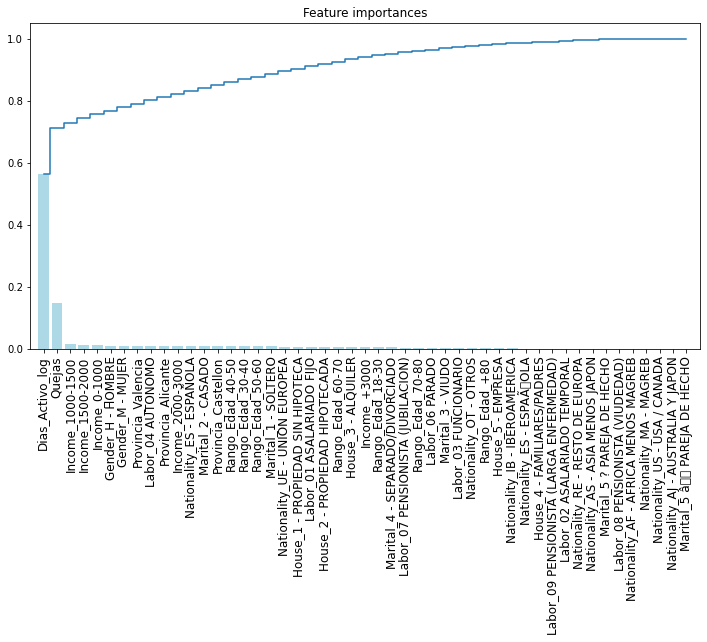

In [76]:
from sklearn.ensemble import ExtraTreesClassifier

# Using ExtraTreesClassifier model function
model = ExtraTreesClassifier()
model.fit(X_train, y_train)

# Printing important features in the model
print(model.feature_importances_)
importances = model.feature_importances_
feat_names = dummy_df.drop(['Monitoring Status'],axis=1).columns

# Displaying the feature importances as a chart by sorting it in the order of importances
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(12,6))
plt.title("Feature importances")
plt.bar(range(len(indices)), importances[indices], color='lightblue',  align="center")
plt.step(range(len(indices)), np.cumsum(importances[indices]), where='mid', label='Cumulative')
plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical',fontsize=12)
plt.xlim([-1, len(indices)])
plt.show()